<a href="https://colab.research.google.com/github/jina2531lee/tmp/blob/main/section3_python_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

## 1.1 Data

* In this lecture, we use the SMS Spam Collection Data Set from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). 
    * A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site.
    * A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore.

In [7]:
#df_sms = pd.read_csv('./SMS_Spam.tsv', sep='\t')

import io
from google.colab import files
# uploaded = files.upload()

# df_sms = pd.read_csv(io.StringIO(uploaded['SMS_Spam.tsv'].decode('utf-8')), sep='\t')
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/KAIST_DataAnalytics실습/data/'
df_sms = pd.read_csv(path+'SMS_Spam.tsv', sep='\t')

Mounted at /content/drive


In [8]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1.2 Exploratory Data Analysis
* First, how many messages the data have?

In [9]:
len(df_sms)

5572

* Then, now, how many spams and hams each other?

In [10]:
df_sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

* Now, let's apply lengths of each message and create a new column.

In [11]:
df_sms['length'] = df_sms['message'].apply(len)

In [12]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


* How are the lengths of messages distributed?

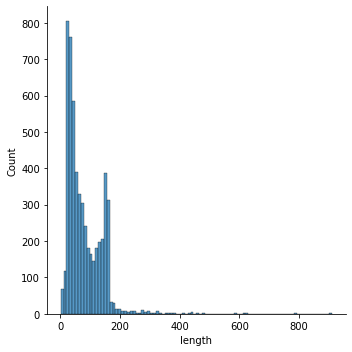

In [13]:
sns.displot(df_sms['length'])
plt.show()

* Are there any differences of the distribution of spam and ham messages?

In [21]:
df_spam = df_sms[df_sms['label']=='spam'].reset_index(drop=True)
df_ham = df_sms[df_sms['label']=='ham'].reset_index(drop=True)
df_ham2 = df_sms[df_sms['label']=='ham']

In [22]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df_ham2.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [16]:
df_ham.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,ham,Even my brother is not like to speak with me. ...,77


<Figure size 1080x720 with 0 Axes>

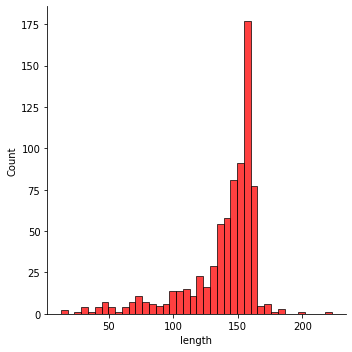

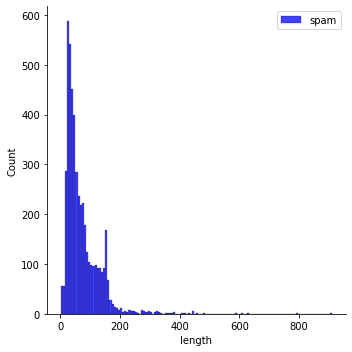

In [15]:
plt.figure(figsize=(15,10))

sns.displot(df_spam['length'], color='red')
sns.displot(df_ham['length'], color='blue')
plt.legend(labels=['spam','ham'])
plt.show()

## 1.3 Text preprocessing
* For analyzing texts, we need to split each message into individual words.
* Let's remove punctuations first.
    * Python's built-in library **string** would provide a quick and convenient way of removing them.

In [24]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

* Check characters whether they are punctuations or not.

In [25]:
sample = "Hello! This is Hyundai Card / Capital / Commercial - KAIST Ditigal Finance course"

In [26]:
sample_nopunc = []
for char in sample:
    if char not in string.punctuation:
        sample_nopunc.append(char)

In [27]:
sample_nopunc = "".join(sample_nopunc)

In [28]:
sample_nopunc

'Hello This is Hyundai Card  Capital  Commercial  KAIST Ditigal Finance course'

* Now, it's a step to remove stopwords. The NLTK library is a kind of stardard library for processing texts in Python (https://www.nltk.org/).
* The NLTK library provide a list of stopwords.

In [29]:
import nltk
from nltk.corpus import stopwords

* We can specify a language for stopwords list.

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

* Split the message and remove stopwords according to the list.

In [32]:
sample_nopunc

'Hello This is Hyundai Card  Capital  Commercial  KAIST Ditigal Finance course'

In [33]:
sample_nopunc.split()

['Hello',
 'This',
 'is',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

In [34]:
remove_stopwords = []
for word in sample_nopunc.split():
    if word.lower() not in stopwords.words('english'):
        remove_stopwords.append(word)

In [35]:
remove_stopwords

['Hello',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

* When you make a function for this, it would be more useful to apply it later.

In [36]:
def preprocessing(text):
    
    # remove punctuation
    nopunc = []
    for char in text:
        if char not in string.punctuation:
            nopunc.append(char)
            
    nopunc = "".join(nopunc)
    
    # remove stopwords
    remove_stop = []
    for word in nopunc.split():
        if word.lower() not in stopwords.words('english'):
            remove_stop.append(word)
            
    # remove words less than three characters
    tokens = []
    for word in remove_stop:
        if len(word) >= 3:
            tokens.append(word)
            
    #tokens = " ".join(tokens)
    
    return tokens

In [37]:
sample

'Hello! This is Hyundai Card / Capital / Commercial - KAIST Ditigal Finance course'

In [38]:
preprocessing(sample)

['Hello',
 'Hyundai',
 'Card',
 'Capital',
 'Commercial',
 'KAIST',
 'Ditigal',
 'Finance',
 'course']

* You can apply the preprocessing function to whole dataframe.

In [39]:
df_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
df_sms['message'].apply(preprocessing)

0       [jurong, point, crazy, Available, bugis, great...
1                                 [lar, Joking, wif, oni]
2       [Free, entry, wkly, comp, win, Cup, final, tkt...
3                    [dun, say, early, hor, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, contact, £750, Pound, prize...
5568                             [going, esplanade, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

## 1.4 Frequency Analysis

In [41]:
clean_spam = df_spam['message'].apply(preprocessing)
clean_ham = df_ham['message'].apply(preprocessing)

* First, let's merge whole values of each dataframe into one list.

In [42]:
whole_spam = []
for line in clean_spam.tolist():
    whole_spam += line
    
whole_ham = []
for line in clean_ham.tolist():
    whole_ham += line

* The **Text** class in **NLTK** library provide some useful methods to text analysis.

In [43]:
from nltk import Text

ham_text = Text(whole_ham)
spam_text = Text(whole_spam)

* The **vocab** method in the **Text** class can extract the frequency of usage for each token.

In [44]:
freqDist_ham = ham_text.vocab()

In [45]:
freqDist_ham.most_common(10)

[('get', 290),
 ('ltgt', 276),
 ('know', 226),
 ('like', 219),
 ('dont', 208),
 ('come', 207),
 ('call', 203),
 ('got', 202),
 ('day', 174),
 ('time', 172)]

* How about spam messages?

In [46]:
freqDist_spam = spam_text.vocab()
freqDist_spam.most_common(10)

[('call', 189),
 ('Call', 137),
 ('FREE', 112),
 ('mobile', 95),
 ('claim', 78),
 ('prize', 73),
 ('text', 72),
 ('txt', 70),
 ('Txt', 70),
 ('STOP', 63)]

* You can plot the distribution of each token by the **plot** method.

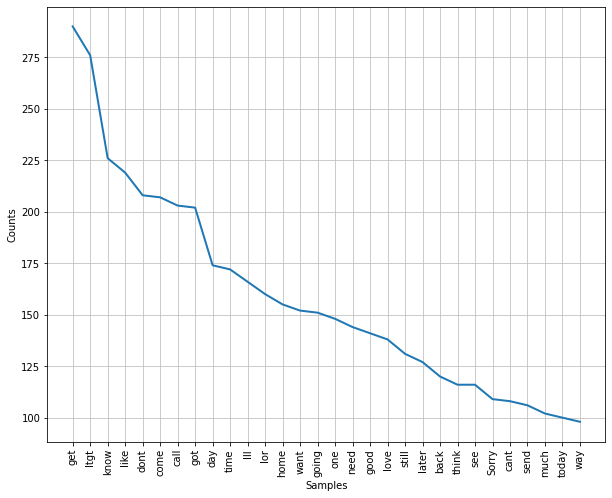

In [47]:
plt.figure(figsize=(10,8))

ham_text.plot(30)
plt.show()

* We can also use the **wordcloud** package for visualization. 
* You can download the package by `conda install -c conda-forge wordcloud`

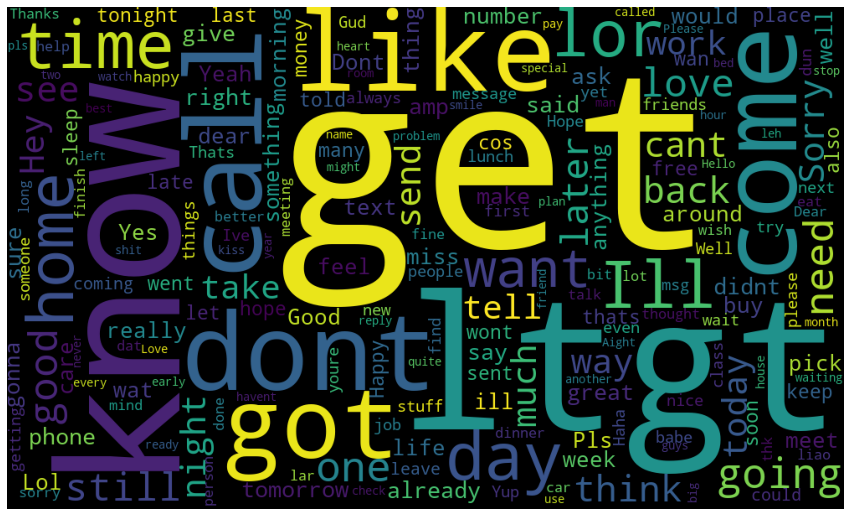

In [48]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))

wc_ham = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.imshow(wc_ham.generate_from_frequencies(freqDist_ham))
plt.axis("off")
plt.show()

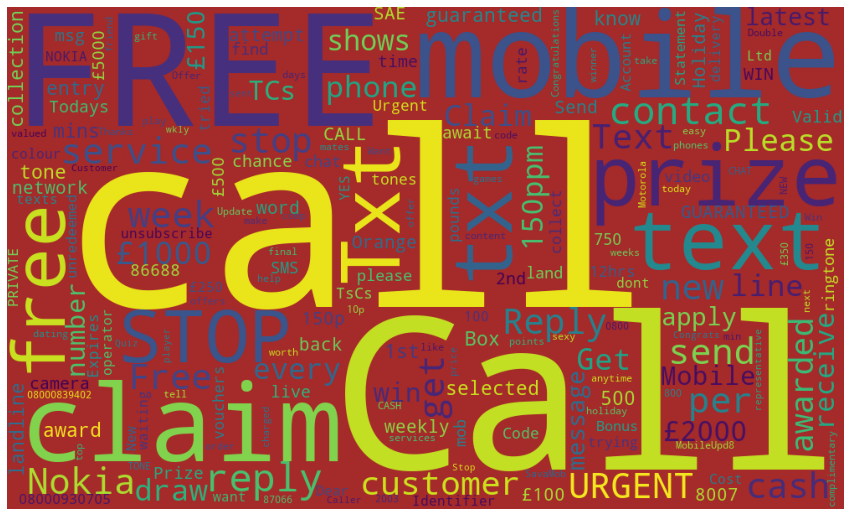

In [52]:
plt.figure(figsize=(15,10))

wc_ham = WordCloud(width=1000, height=600, background_color="brown", random_state=0)
plt.imshow(wc_ham.generate_from_frequencies(freqDist_spam))
plt.axis("off")
plt.show()

# Part 2 : Recommendation System

* Recommendation system is a sort of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications (https://en.wikipedia.org/wiki/Recommender_system)
* There are two common types of recommender systems:
    * **Content-Based Filtering** focus on the attributes of the items and give you recommendations based on the similarity between them.
    
    * **Collaborative Filtering** produces recommendations based on the user's attitude (activity) to items.


* Movie recommendation is one of the first step to start learning recommendation systems.
* MovieLens dataset is a famous one for learning to build the recommendation systems.
    * https://grouplens.org/datasets/movielens/
    * https://kaggle.com/grouplens/movielens-20m-dataset

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
#movies = pd.read_csv('./movies.csv')

# uploaded = files.upload()
# movies = pd.read_csv(io.StringIO(uploaded['movies.csv'].decode('utf-8')))

path = '/content/drive/MyDrive/KAIST_DataAnalytics실습/data/'
movies = pd.read_csv(path+'movies.csv')

In [58]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


* Let's produce a content-based filtering based on genre similarity.

In [59]:
vectorizer = CountVectorizer()
genre_vec = vectorizer.fit_transform(movies['genres'])

In [91]:
pd.DataFrame(genre_vec.toarray()).shape

(9742, 24)

In [89]:
movies['genres'].nunique()

951

In [85]:
movies.shape

(9742, 3)

In [84]:
pd.DataFrame(genre_vec.toarray()).shape

(9742, 24)

In [83]:
pd.DataFrame(genre_vec.toarray())

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
sim_mat = cosine_similarity(genre_vec, genre_vec)

In [82]:
pd.DataFrame(sim_mat)

,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
0,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.400000,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
1,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
2,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.316228,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
3,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.258199,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
4,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.447214,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.670820,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
9738,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.516398,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
9739,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000
9740,0.316228,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.707107,0.408248,...,0.632456,0.500000,0.000000,0.707107,0.0,0.707107,0.408248,0.00000,1.000000,0.000000


In [63]:
genre_sim = pd.DataFrame(index=movies['title'], columns=movies['title'], data=sim_mat)

In [64]:
genre_sim

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.400000,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
Jumanji (1995),0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
Grumpier Old Men (1995),0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.316228,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
Waiting to Exhale (1995),0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.258199,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
Father of the Bride Part II (1995),0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.447214,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.670820,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
No Game No Life: Zero (2017),0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.516398,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
Flint (2017),0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


* Now, let's import one more dataset "ratings.csv", and produce collaborative filtering.

In [76]:
#ratings = pd.read_csv('./ratings.csv')

# uploaded = files.upload()
# ratings = pd.read_csv(io.StringIO(uploaded['ratings.csv'].decode('utf-8')))

ratings = pd.read_csv(path+'ratings.csv')

In [77]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


* Let's merge those two dataframes.

In [99]:
df_movies = pd.merge(movies, ratings, on = 'movieId', how = 'outer')
df_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


* Which movie has the highest user ratings on average?

In [100]:
df_movies.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9737, dtype: float64

* Which movies received the most ratings from users?

In [101]:
df_movies.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Gena the Crocodile (1969)                      5.0
True Stories (1986)                            5.0
Cosmic Scrat-tastrophe (2015)                  5.0
Love and Pigeons (1985)                        5.0
Red Sorghum (Hong gao liang) (1987)            5.0
                                              ... 
Road Home, The (Wo de fu qin mu qin) (1999)    NaN
Roaring Twenties, The (1939)                   NaN
Scrooge (1970)                                 NaN
This Gun for Hire (1942)                       NaN
Twentieth Century (1934)                       NaN
Name: rating, Length: 9737, dtype: float64

In [102]:
df_movies.groupby('title')['rating'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                             329
Shawshank Redemption, The (1994)                317
Pulp Fiction (1994)                             307
Silence of the Lambs, The (1991)                279
Matrix, The (1999)                              278
                                               ... 
Color of Paradise, The (Rang-e khoda) (1999)      0
I Know Where I'm Going! (1945)                    0
Proof (1991)                                      0
This Gun for Hire (1942)                          0
Scrooge (1970)                                    0
Name: rating, Length: 9737, dtype: int64

* Let's combine of those two results.

In [98]:
movie_ratings = pd.DataFrame(df_movies.groupby('title')['rating'].mean())
movie_ratings['numbers'] = pd.DataFrame(df_movies.groupby('title')['rating'].count())
movie_ratings.head()

,rating,numbers
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


* Now, reshape the dataframe with using pivot_table.

In [103]:
df_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [105]:
user_movie_matrix  = df_movies.pivot_table(index ='userId', columns = 'title', values = 'rating')
user_movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Fill the NaN values to 0.

In [107]:
user_movie_matrix.fillna(0, inplace= True)
user_movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Let's take two examples of movies.

In [108]:
Matrix = user_movie_matrix['Matrix, The (1999)']
Matrix.head(10)

userId
1.0     5.0
2.0     0.0
3.0     0.0
4.0     1.0
5.0     0.0
6.0     0.0
7.0     0.0
8.0     0.0
9.0     0.0
10.0    0.5
Name: Matrix, The (1999), dtype: float64

In [109]:
Terminator = user_movie_matrix['Terminator 2: Judgment Day (1991)']
Terminator.head(10)

userId
1.0     0.0
2.0     0.0
3.0     0.0
4.0     0.0
5.0     3.0
6.0     3.0
7.0     2.5
8.0     0.0
9.0     0.0
10.0    0.0
Name: Terminator 2: Judgment Day (1991), dtype: float64

* How similar with those two movies?

In [110]:
Matrix.corr(Terminator)

0.3061001767524353

* Which movie is the most similar with the "Matrix, The (1999)"?

In [111]:
Matrix_corr = pd.DataFrame(user_movie_matrix.corrwith(Matrix), columns=['correl'])

In [112]:
Matrix_corr.sort_values(by='correl', ascending=False).head(10)

,correl
title,
"Matrix, The (1999)",1.000000
Fight Club (1999),0.538214
Star Wars: Episode V - The Empire Strikes Back (1980),0.522634
Saving Private Ryan (1998),0.508636
"Sixth Sense, The (1999)",0.476540
Star Wars: Episode VI - Return of the Jedi (1983),0.472435
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.461023
"Terminator, The (1984)",0.458329
"Lord of the Rings: The Return of the King, The (2003)",0.450039


* Now, let's use one more metric for similarity - Cosine similarity

In [114]:
movie_user_matrix = df_movies.pivot_table(index='title', columns='userId', values='rating')
movie_user_matrix.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
movie_user_matrix.fillna(0, inplace=True)

item_based_filter = cosine_similarity(movie_user_matrix)

In [116]:
item_based_matrix = pd.DataFrame(index=movie_user_matrix.index, columns=movie_user_matrix.index, data=item_based_filter)

In [119]:
item_based_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.141653,0.000000,...,0.000000,0.342055,0.543305,0.707107,0.0,0.000000,0.139431,0.327327,0.000000,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Round Midnight (1986),0.000000,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Salem's Lot (2004),0.000000,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Til There Was You (1997),0.000000,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.211467,0.216295,0.097935,0.132489,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.192259,0.000000,0.170341,0.0
xXx (2002),0.139431,0.000000,0.000000,0.000000,0.000000,0.0,0.089634,0.000000,0.276512,0.019862,...,0.069716,0.305535,0.173151,0.246482,0.0,0.192259,1.000000,0.270034,0.100396,0.0
xXx: State of the Union (2005),0.327327,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.156764,0.000000,...,0.000000,0.382543,0.177838,0.231455,0.0,0.000000,0.270034,1.000000,0.000000,0.0


In [120]:
item_based_matrix['Matrix, The (1999)'].sort_values(ascending = False)

title
Matrix, The (1999)                                       1.000000
Fight Club (1999)                                        0.713937
Star Wars: Episode V - The Empire Strikes Back (1980)    0.700935
Saving Private Ryan (1998)                               0.679615
Star Wars: Episode IV - A New Hope (1977)                0.663447
                                                           ...   
Goodbye Charlie (1964)                                   0.000000
Stanley Kubrick: A Life in Pictures (2001)               0.000000
Gordy (1995)                                             0.000000
Grandmaster, The (Yi dai zong shi) (2013)                0.000000
À nous la liberté (Freedom for Us) (1931)                0.000000
Name: Matrix, The (1999), Length: 9719, dtype: float64

In [123]:
item_based_matrix['Star Wars: Episode IV - A New Hope (1977)'].sort_values(ascending = False).head(20)

title
Star Wars: Episode IV - A New Hope (1977)                                         1.000000
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.832407
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.790639
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.708834
Matrix, The (1999)                                                                0.663447
Indiana Jones and the Last Crusade (1989)                                         0.641719
Back to the Future (1985)                                                         0.622806
Star Wars: Episode I - The Phantom Menace (1999)                                  0.604377
Terminator, The (1984)                                                            0.596987
Godfather, The (1972)                                                             0.595317
Saving Private Ryan (1998)                                                        0.

# Part 3 : Cluster analysis

* Clustering is a Machine Learning technique that involves the grouping of data points.
    * https://en.wikipedia.org/wiki/Cluster_analysis
    * https://developers.google.com/machine-learning/clustering/clustering-algorithms
* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms that will attempt to group similar clusters together in data (https://en.wikipedia.org/wiki/K-means_clustering).
* You can also check out further materials to learn.
    * http://www.mit.edu/~9.54/fall14/slides/Class13.pdf
    * https://www.youtube.com/watch?v=Ev8YbxPu_bQ
    * https://www.youtube.com/watch?v=hDmNF9JG3lo
    * https://www.coursera.org/learn/data-science-k-means-clustering-python#syllabus

* Let's apply the k-means algorithm to the sample data.

In [134]:
#data = pd.read_csv('./samples.csv')

# uploaded = files.upload()
# data = pd.read_csv(io.StringIO(uploaded['samples.csv'].decode('utf-8')))

data = pd.read_csv(path+'samples.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


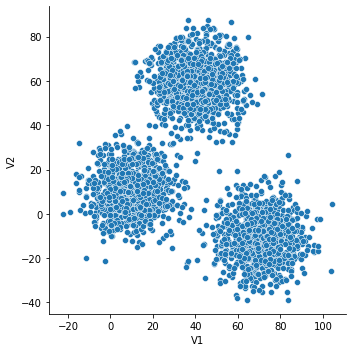

In [127]:
sns.relplot(x='V1', y='V2', data=data, kind='scatter')
plt.show()

* Of course, the scikit-learn package provide model for k-means algorithm.

In [128]:
from sklearn.cluster import KMeans



* How about applying a different K?

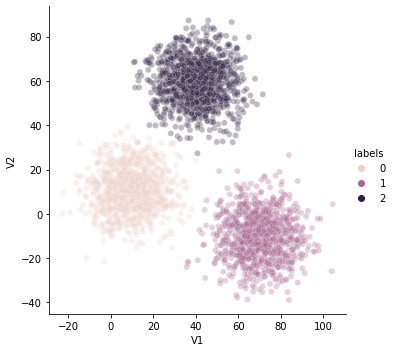

In [144]:
kmeans = KMeans(n_clusters=3)
data = data.drop(columns= ['labels'])
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

data['labels'] = labels
labels
data.head()

sns.relplot(x = "V1", y = "V2", data = data, kind = 'scatter', hue = 'labels', alpha = .3)
plt.show()

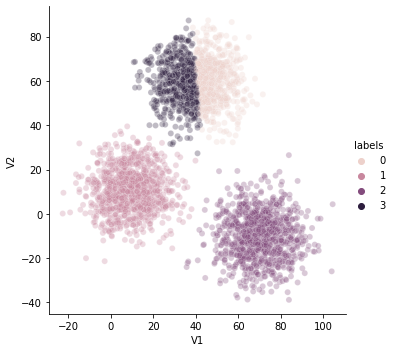

In [143]:
kmeans = KMeans(n_clusters=4)
data = data.drop(columns= ['labels'])
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

data['labels'] = labels
labels
data.head()

sns.relplot(x = "V1", y = "V2", data = data, kind = 'scatter', hue = 'labels', alpha = .3)
plt.show()

* How can we decide the best $K$ value? 

In [139]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

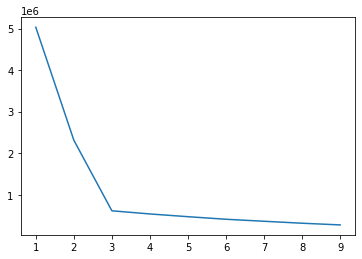

In [140]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* Now, let's take a look at the customer segmentation data,
    * https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [146]:
#customers = pd.read_csv('./Mall_Customers.csv')

# uploaded = files.upload()
# customers = pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')))

customers = pd.read_csv(path+'Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* Let's apply clustering algorithm with two features, annual income and spending score.

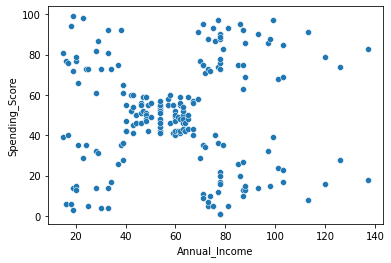

In [147]:
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score',  data = customers)
plt.show()

In [148]:
data = customers[['Annual_Income', 'Spending_Score']]

In [149]:
kmeans = KMeans(n_clusters=5)
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

In [150]:
customers['cluster'] = labels

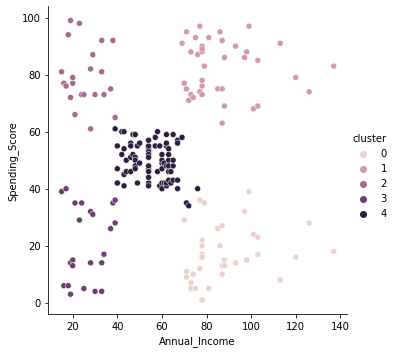

In [151]:
sns.relplot(x='Annual_Income', y='Spending_Score', hue='cluster',data=customers)
plt.show()

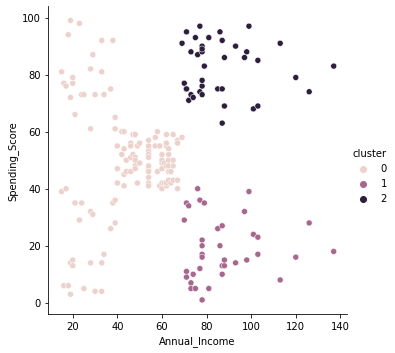

In [155]:
data = data#.drop(columns = ['labels'])
kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)
customers['cluster'] = labels
sns.relplot(x='Annual_Income', y='Spending_Score', hue='cluster',data=customers)
plt.show()

In [152]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

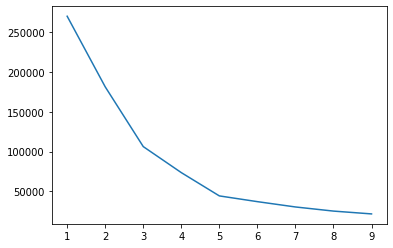

In [153]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* One more thing with saving the trained model and reload to predict.
    * You can produce a kind of Web App with streamlit (https://streamlit.io/)

In [ ]:
from joblib import dump, load

dump(kmeans, './Mall_Customers_clusters.joblib')

In [ ]:
# load the model
model = load('./Mall_Customers_clusters.joblib')

In [ ]:
income = 80
score = 20

row = [income, score]
feat_cols = data.columns

df = pd.DataFrame([row], columns = feat_cols)
features = pd.DataFrame(df, columns = feat_cols)

In [ ]:
model.predict(features)